In [46]:
# portfolio Project
import boto3
import pandas as pd
import io

In [47]:
# Initialize S3 client
s3 = boto3.client('s3')

# Specify the bucket name and file key
bucket_name = 'bihani-portfolio-project-1'
file_key = 'online_retail.csv'

# Get the object from S3
csv_obj = s3.get_object(Bucket=bucket_name, Key=file_key)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

# Read the CSV into a Pandas DataFrame
df = pd.read_csv(io.StringIO(csv_string))

# Quick look at the DataFrame
print(df.head())

   index InvoiceNo StockCode                          Description  Quantity  \
0      0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      1    536365     71053                  WHITE METAL LANTERN         6   
2      2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


Perfroming EDA

In [48]:
df.describe()

,index,Quantity,UnitPrice,CustomerID
count,541909.00000,541909.000000,541909.000000,406829.000000
mean,270954.00000,9.552250,4.611114,15287.690570
std,156435.79785,218.081158,96.759853,1713.600303
min,0.00000,-80995.000000,-11062.060000,12346.000000
25%,135477.00000,1.000000,1.250000,13953.000000
50%,270954.00000,3.000000,2.080000,15152.000000
75%,406431.00000,10.000000,4.130000,16791.000000
max,541908.00000,80995.000000,38970.000000,18287.000000


In [49]:
print(df.isnull().sum())

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [50]:
df.shape

(541909, 9)

In [51]:
df.columns

Index(['index', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [52]:
df.dtypes

index            int64
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Data cleaning and Pre Processiong 

In [53]:
# Convert data types
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype('string')
df['Country'] = df['Country'].astype('category')

In [54]:
df.dtypes

index                   int64
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID     string[python]
Country              category
dtype: object

In [55]:
# Handle Missing Values
# Filling missing descriptions with a placeholder
df['Description'] = df['Description'].fillna('No Description')

In [56]:
# Replace missing 'CustomerID' values with "Guest" 
# Convert CustomerID to string so that "Guest" is a valid entry
df['CustomerID'] = df['CustomerID'].fillna('Guest').astype(str) 

In [57]:
# Re-check missing values after replacement
print(df.isnull().sum())

index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


Feature Engineering 

In [58]:
# to analyze the time period, additional columns are created
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

In [59]:
# Create a Revenue column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [60]:
# Create a transaction type column based on Qualtity
df['TransactionType'] = df['Quantity'].apply(lambda x: 'Return/Correction' if x < 0 else 'Sale')

In [61]:
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,DayOfWeek,Revenue,TransactionType
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,Wednesday,15.30,Sale
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,Wednesday,20.34,Sale
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,Wednesday,22.00,Sale
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,Wednesday,20.34,Sale
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,Wednesday,20.34,Sale


In [63]:
df.describe()

,index,Quantity,InvoiceDate,UnitPrice,Year,Month,Revenue
count,541909.00000,541909.000000,541909,541909.000000,541909.000000,541909.000000,541909.000000
mean,270954.00000,9.552250,2011-07-04 13:34:57.156386048,4.611114,2010.921609,7.553128,17.987795
min,0.00000,-80995.000000,2010-12-01 08:26:00,-11062.060000,2010.000000,1.000000,-168469.600000
25%,135477.00000,1.000000,2011-03-28 11:34:00,1.250000,2011.000000,5.000000,3.400000
50%,270954.00000,3.000000,2011-07-19 17:17:00,2.080000,2011.000000,8.000000,9.750000
75%,406431.00000,10.000000,2011-10-19 11:27:00,4.130000,2011.000000,11.000000,17.400000
max,541908.00000,80995.000000,2011-12-09 12:50:00,38970.000000,2011.000000,12.000000,168469.600000
std,156435.79785,218.081158,NaN,96.759853,0.268787,3.509055,378.810824


Descriptive Analysis

In [64]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

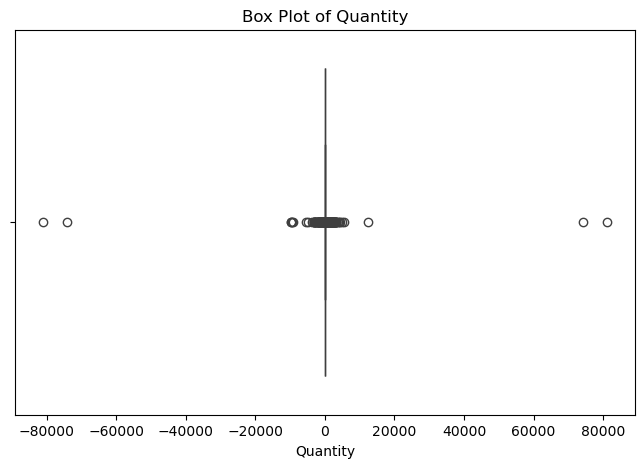

In [65]:
# Plot a box plot of the Quantity column
plt.figure(figsize=(8, 5))

sns.boxplot(x=df['Quantity'])
plt.title("Box Plot of Quantity")
plt.show()

In [66]:
# from the above box plot, we can see that there are 4 outliers, seems like incorrectly added a large quantity and removed it by adding - values. 
# Identify the 2 largest Quantity values
largest_2 = df.nlargest(2, 'Quantity')

# Identify the 2 smallest Quantity values
smallest_2 = df.nsmallest(2, 'Quantity')

# Combine them into one DataFrame
outliers = pd.concat([largest_2, smallest_2])

# Drop them from the main DataFrame
df = df.drop(outliers.index)


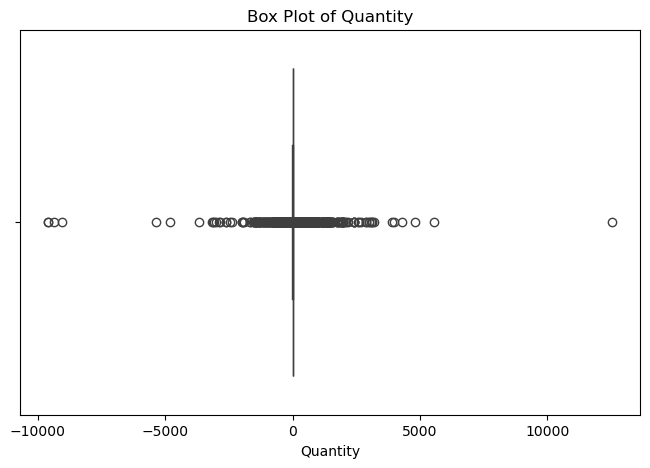

In [67]:
# Plot a box plot of the Quantity column
plt.figure(figsize=(8, 5))

sns.boxplot(x=df['Quantity'])
plt.title("Box Plot of Quantity")
plt.show()

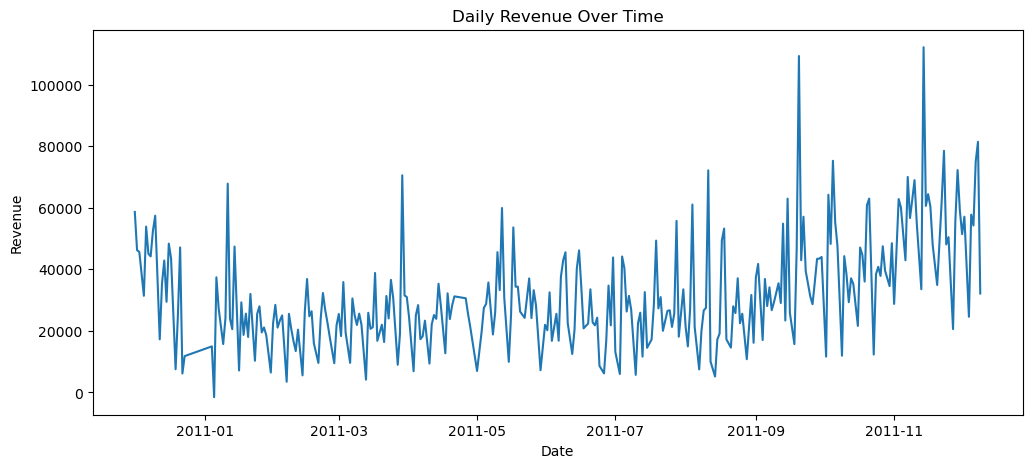

In [69]:
# Time-Series Analysis: Daily Revenue
df['Date'] = df['InvoiceDate'].dt.date
daily_revenue = df.groupby('Date')['Revenue'].sum()
plt.figure(figsize=(12, 5))
daily_revenue.plot()
plt.title("Daily Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

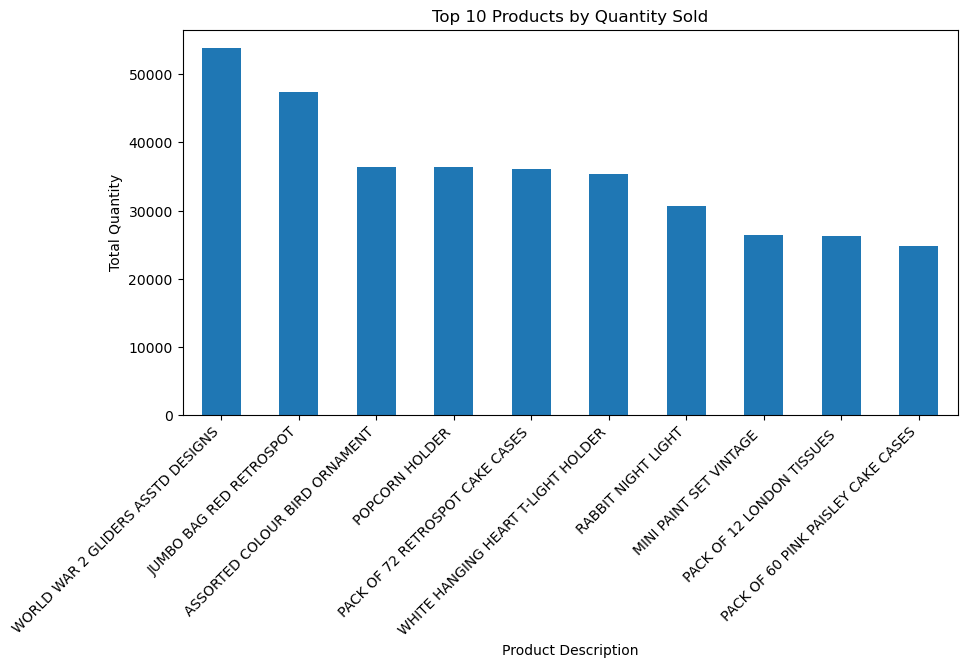

In [70]:
# Top 10 Products by Quantity
top_products_qty = (df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10))

plt.figure(figsize=(10, 5))
top_products_qty.plot(kind='bar')
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Product Description")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\Bihani\AppData\Local\Temp\ipykernel_21876\1132310390.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_countries = (df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10))


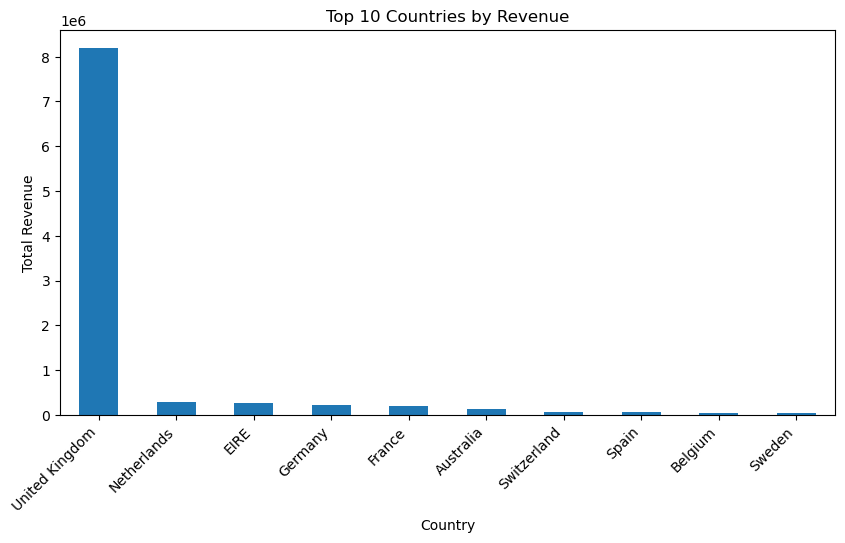

In [71]:
# Top 10 Countries by Revenue
top_countries = (df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10))

plt.figure(figsize=(10, 5))
top_countries.plot(kind='bar')
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha='right')
plt.show()

In [74]:
# Most frequent products 
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64

In [76]:
# Highest Revenue Products:
top_revenue = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
top_revenue


Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
RABBIT NIGHT LIGHT                     66756.59
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
ASSORTED COLOUR BIRD ORNAMENT          58959.73
CHILLI LIGHTS                          53768.06
Name: Revenue, dtype: float64

In [77]:
# 2. Identify New vs. Returning Customers

# Group by CustomerID to calculate:
# - Frequency: number of unique invoices (transactions) per customer
# - Total Revenue: sum of revenue per customer
customer_summary = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',   # Count unique purchases
    'Revenue': 'sum'
}).rename(columns={'InvoiceNo': 'Frequency'})

# Classify customers: New if Frequency == 1, Returning if Frequency > 1
customer_summary['CustomerType'] = customer_summary['Frequency'].apply(lambda x: 'New' if x == 1 else 'Returning')

# -------------------------------
# 3. Aggregate Revenue Metrics by Customer Type
# -------------------------------
rfm_summary = customer_summary.groupby('CustomerType').agg({
    'Revenue': ['sum', 'mean', 'count']
}).reset_index()

# Rename columns for clarity
rfm_summary.columns = ['CustomerType', 'TotalRevenue', 'AvgRevenue', 'CustomerCount']
print("Revenue Metrics by Customer Type:")
print(rfm_summary)

Revenue Metrics by Customer Type:
  CustomerType  TotalRevenue   AvgRevenue  CustomerCount
0          New    433787.571   330.127527           1314
1    Returning   9313960.363  3045.768595           3058


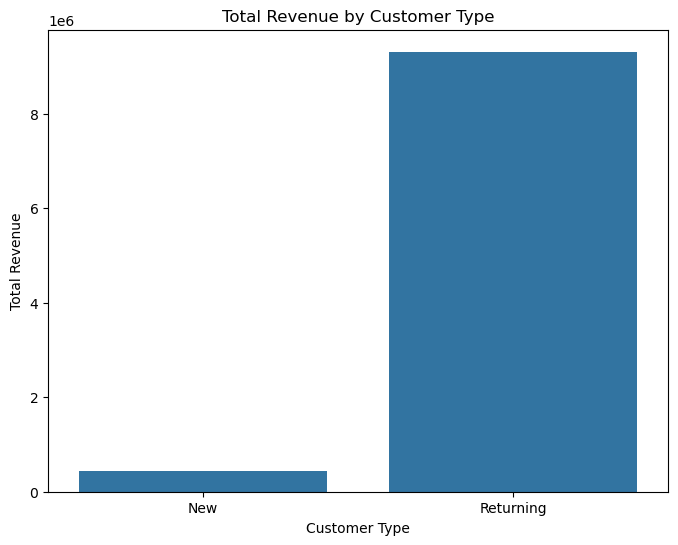

In [78]:


# Visualize the Comparison
# -------------------------------
# Bar chart for Total Revenue by Customer Type
plt.figure(figsize=(8, 6))
sns.barplot(data=rfm_summary, x='CustomerType', y='TotalRevenue')
plt.title("Total Revenue by Customer Type")
plt.ylabel("Total Revenue")
plt.xlabel("Customer Type")
plt.show()

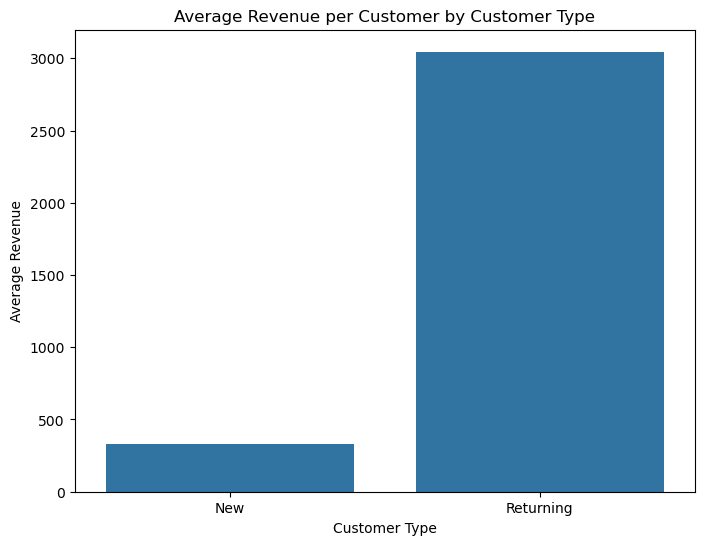

In [79]:
# Bar chart for Average Revenue per Customer by Customer Type
plt.figure(figsize=(8, 6))
sns.barplot(data=rfm_summary, x='CustomerType', y='AvgRevenue')
plt.title("Average Revenue per Customer by Customer Type")
plt.ylabel("Average Revenue")
plt.xlabel("Customer Type")
plt.show()


In [80]:
# Calculate percentage of total revenue generated by each customer type
total_rev = rfm_summary['TotalRevenue'].sum()
rfm_summary['PctRevenue'] = (rfm_summary['TotalRevenue'] / total_rev) * 100
print("\nPercentage Revenue by Customer Type:")
print(rfm_summary[['CustomerType', 'PctRevenue']])


Percentage Revenue by Customer Type:
  CustomerType  PctRevenue
0          New    4.450131
1    Returning   95.549869


In [81]:
# Customer Segmentation

# Define Snapshot Date

# Define a snapshot date as one day after the latest InvoiceDate in the dataset.
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Calculate RFM Metrics
# Group by CustomerID and calculate:
# - Recency: Number of days since the customer's last purchase.
# - Frequency: Count of unique invoices per customer.
# - Monetary: Total revenue for each customer.
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Revenue': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Revenue': 'Monetary'
})

#Explore the RFM Results

# Display the first few rows of the RFM DataFrame
print("RFM Analysis (first 5 rows):")
print(rfm_df.head())

# Optionally, get summary statistics of the RFM metrics
print("\nRFM Metrics Summary:")
print(rfm_df.describe())



RFM Analysis (first 5 rows):
            Recency  Frequency  Monetary
CustomerID                              
12347.0           2          7   4310.00
12348.0          75          4   1797.24
12349.0          19          1   1757.55
12350.0         310          1    334.40
12352.0          36         11   1545.41

RFM Metrics Summary:
           Recency    Frequency      Monetary
count  4372.000000  4372.000000  4.372000e+03
mean     92.019671     5.923147  2.229586e+03
std     100.718027    56.805311  2.335947e+04
min       1.000000     1.000000 -4.287630e+03
25%      17.000000     1.000000  2.939525e+02
50%      50.000000     3.000000  6.485500e+02
75%     143.000000     5.000000  1.612295e+03
max     374.000000  3710.000000  1.447682e+06


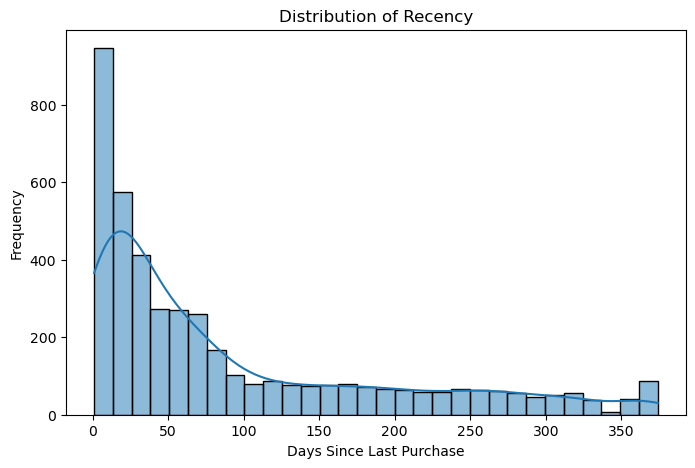

In [82]:
# Visualize the RFM Distributions

# Plot distribution of Recency
plt.figure(figsize=(8, 5))
sns.histplot(rfm_df['Recency'], bins=30, kde=True)
plt.title("Distribution of Recency")
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Frequency")
plt.show()

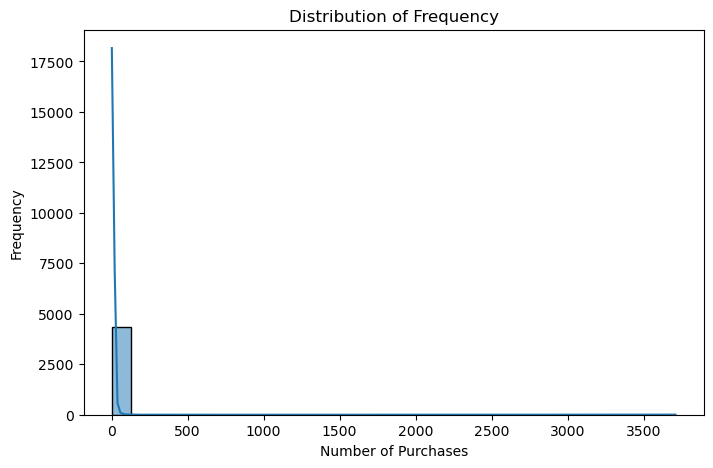

In [83]:
# Plot distribution of Frequency
plt.figure(figsize=(8, 5))
sns.histplot(rfm_df['Frequency'], bins=30, kde=True)
plt.title("Distribution of Frequency")
plt.xlabel("Number of Purchases")
plt.ylabel("Frequency")
plt.show()

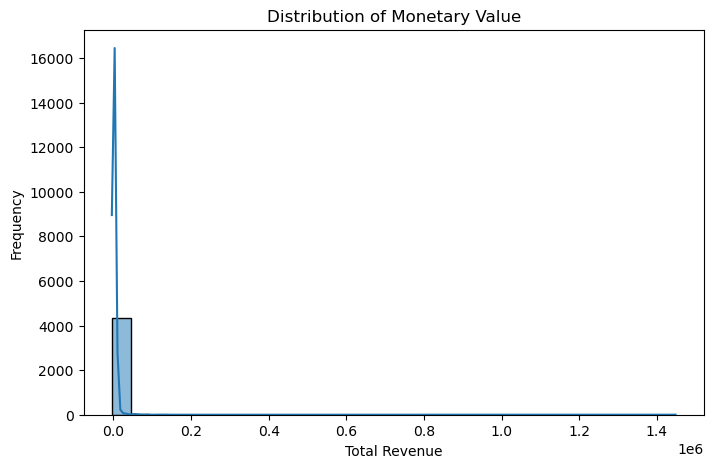

In [84]:
# Plot distribution of Monetary
plt.figure(figsize=(8, 5))
sns.histplot(rfm_df['Monetary'], bins=30, kde=True)
plt.title("Distribution of Monetary Value")
plt.xlabel("Total Revenue")
plt.ylabel("Frequency")
plt.show()

In [92]:
# Number of unique customers (including Guest)
num_customers = df['CustomerID'].nunique()
print(f"Number of unique customers (including 'Guest'): {num_customers}")

Number of unique customers (including 'Guest'): 4372


In [91]:
# Number of unique products
num_products = df['Description'].nunique()
print(f"Number of unique products: {num_products}")

Number of unique products: 4223


In [90]:
#Which country has the highest revenue?
top_country = df.groupby('Country')['Revenue'].sum().idxmax()
print(f"Country with highest revenue: {top_country}")

Country with highest revenue: United Kingdom


C:\Users\Bihani\AppData\Local\Temp\ipykernel_21876\1243844057.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_country = df.groupby('Country')['Revenue'].sum().idxmax()


In [89]:
#Daily revenue statistics
print("Daily revenue stats:")
print(daily_revenue.describe())

Daily revenue stats:
count       305.000000
mean      31959.829292
std       17414.261664
min       -1566.230000
25%       20728.140000
50%       27978.410000
75%       42912.400000
max      112141.110000
Name: Revenue, dtype: float64
